# Importando dados

In [40]:
import pandas as pd
from scipy.stats import ranksums

In [2]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
type(dados)

pandas.core.frame.DataFrame

In [5]:
renomear = {
    'total_bill' : 'total_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_pessoas'
}

In [6]:
gorjetas = dados.rename(columns = renomear)

In [7]:
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [10]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [12]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [14]:
import seaborn as sns

In [15]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\igors\anaconda3\envs\untitled\lib\site-packages
Requires: matplotlib, scipy, pandas, numpy
Required-by: 


# Analise I - Valor da Conta e Gorjeta

In [16]:
gorjetas.columns

Index(['total_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora_do_dia',
       'total_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='total_conta', ylabel='gorjeta'>

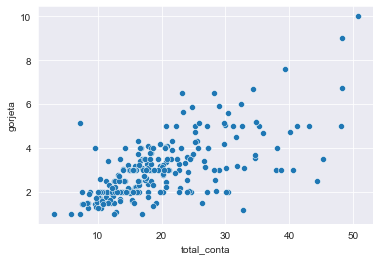

In [17]:
valor_gorjeta = sns.scatterplot(x='total_conta', y='gorjeta', data=gorjetas)
valor_gorjeta

 Analisando este primeiro gráfico, poderemos ver as relações entre os eixos x e y. Aparentemente, há uma progressão linear que indica o aumento do valor da gorjeta conforme o valor da conta é maior para cada mesa.

In [18]:
# vizualizando se temos valores nulos
print(f'A base de dados contém {gorjetas.shape[0]} registros.\n')
print(f'Registros não nulos  = \n{gorjetas.count()}')

A base de dados contém 244 registros.

Registros não nulos  = 
total_conta      244
gorjeta          244
sobremesa        244
dia_da_semana    244
hora_do_dia      244
total_pessoas    244
dtype: int64


In [19]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['total_conta']
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


<AxesSubplot:xlabel='total_conta', ylabel='porcentagem'>

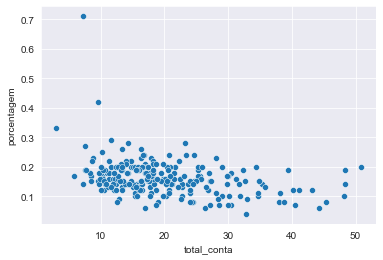

In [20]:
porcentagem_conta = sns.scatterplot(x='total_conta', y='porcentagem', data=gorjetas)
porcentagem_conta

O resultado é bastante interessante, pois visualmente parece que o valor da conta não é proporcional ao valor da gorjeta, e sim que diminui. Ou seja, nas contas mais altas, os valores das gorjetas foram maiores do que as mais baixas, porém não são proporcionais, apesar das impressões do primeiro gráfico feito anteriormente.

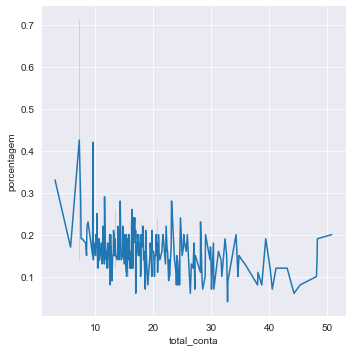

In [21]:
porcentagem_conta_linha = sns.relplot(x='total_conta', y='porcentagem', kind='line', data=gorjetas)

Visualmente a proporção não é linear, pois parece que a porcentagem diminui conforme o valor da conta aumenta mas com oscilações.

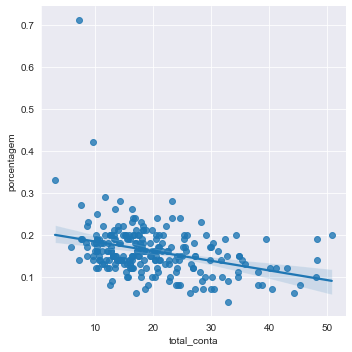

In [22]:
porcentagem_conta_linha_02 = sns.lmplot(x='total_conta', y='porcentagem', data=gorjetas)
porcentagem_conta_linha_02

Com este gráfico, poderemos ver que realmente o valor da porcentagem tende a diminuir com o aumento do valor total da conta.

<AxesSubplot:xlabel='total_conta', ylabel='porcentagem'>

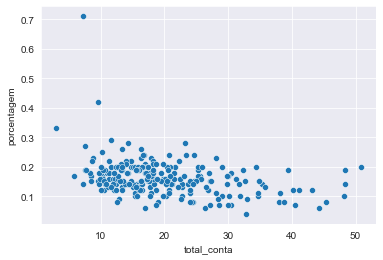

In [23]:
export_porcentagem_conta_linha_02 = sns.scatterplot(x='total_conta', y='porcentagem', data=gorjetas)
export_porcentagem_conta_linha_02

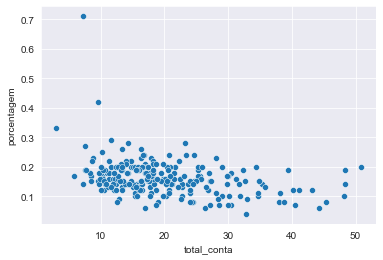

In [24]:
export_porcentagem_conta_linha_02.get_figure()

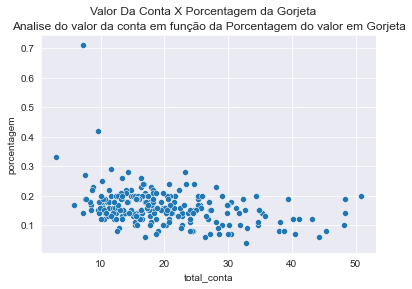

In [25]:
export_porcentagem_conta_linha_02.figure.suptitle('Valor Da Conta X Porcentagem da Gorjeta')
export_porcentagem_conta_linha_02.set_title('Analise do valor da conta em função da Porcentagem do valor em Gorjeta')
export_porcentagem_conta_linha_02.get_figure()

## Salvando a Imagem

In [26]:
img = export_porcentagem_conta_linha_02.get_figure()
img.savefig('img.png')

# Análise 2 - Sobremesa

In [27]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,total_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [28]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,total_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


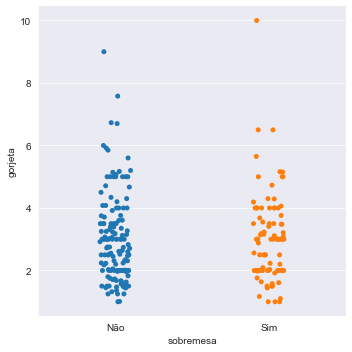

In [29]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

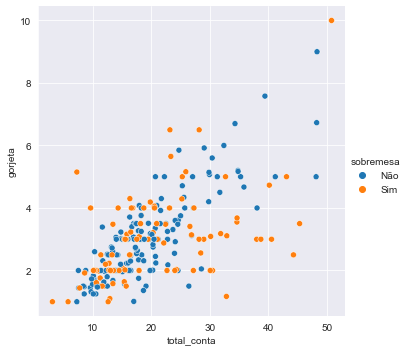

In [30]:
sns.relplot(x='total_conta', y='gorjeta',hue='sobremesa', data=gorjetas)

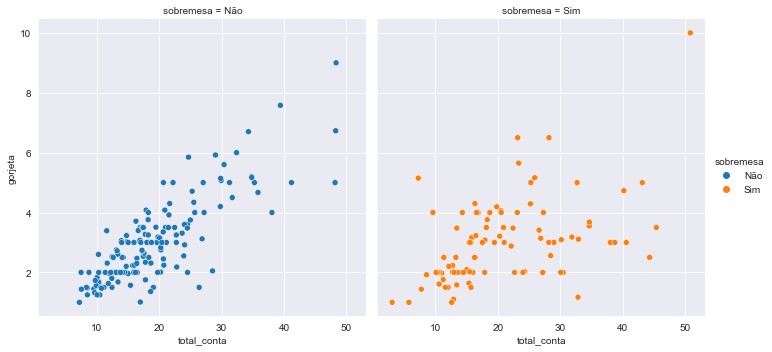

In [31]:
sns.relplot(x='total_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

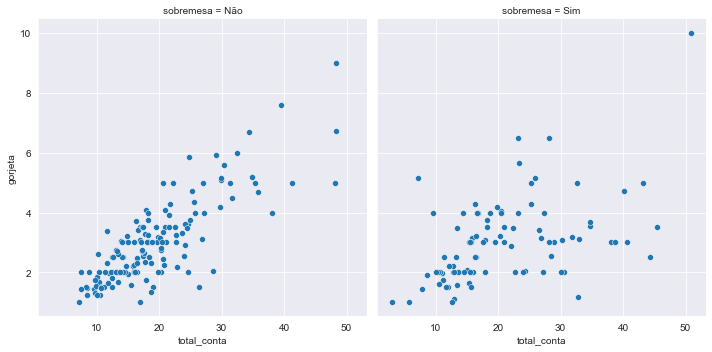

In [32]:
sns.relplot(x='total_conta', y='gorjeta', col='sobremesa', data=gorjetas)

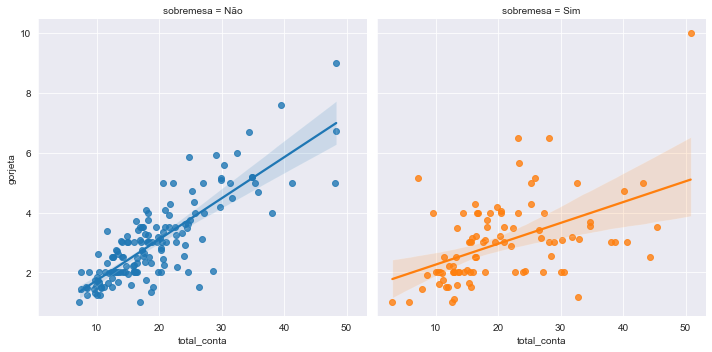

In [33]:
sns.lmplot(x='total_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

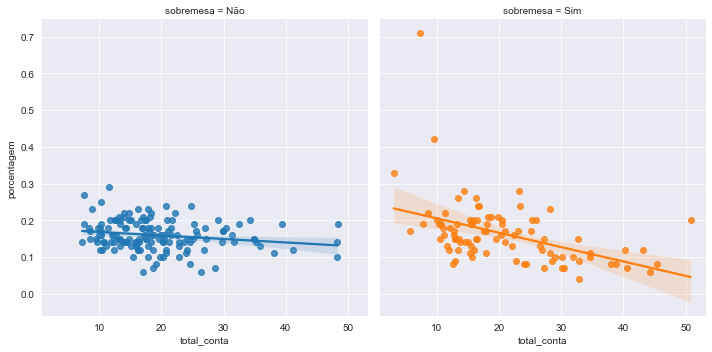

In [34]:
sns.lmplot(x='total_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

Visualmente existe uma diferença no valor da gorjeta daquelas que pediram a sobremesa e daqueles não pediram a sobremesa.

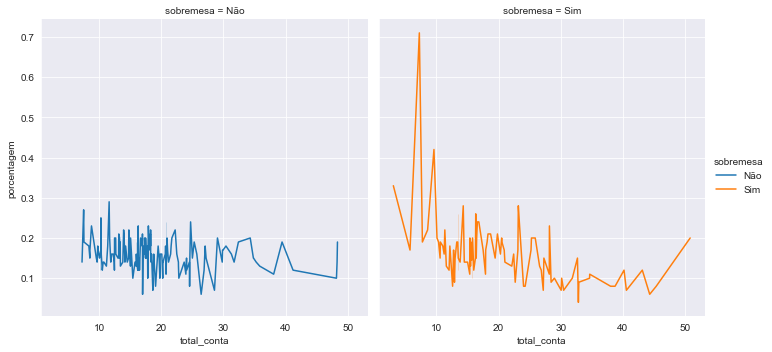

In [35]:
sns.relplot(x='total_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [36]:
com_sobremesa = gorjetas.query("sobremesa == 'Sim'" ).porcentagem

In [37]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'" ).porcentagem

In [41]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [42]:
print(f'O valor do p-value é {r.pvalue}') # p-value representa a probabilidade daquela amostra ter acontecido dentro da população.
# Se a chance é pequena, geralmente p-value < 0,05

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**


In [43]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise 3 - Dia Da Semana

In [44]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

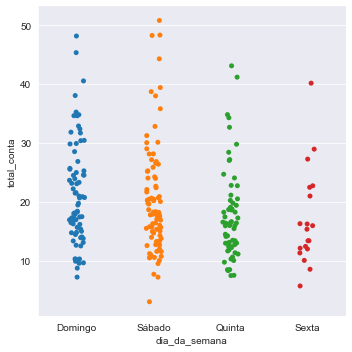

In [45]:
sns.catplot(x='dia_da_semana', y='total_conta', data=gorjetas)

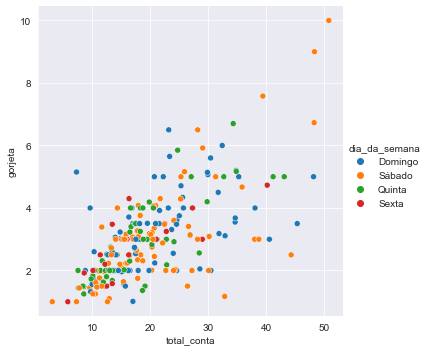

In [46]:
sns.relplot(x='total_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

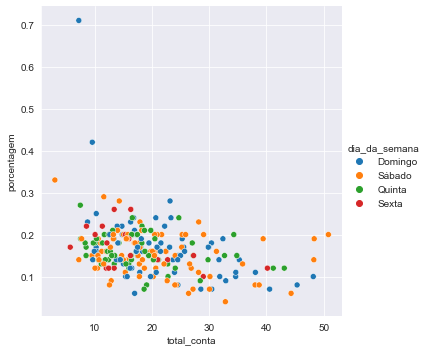

In [47]:
sns.relplot(x='total_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

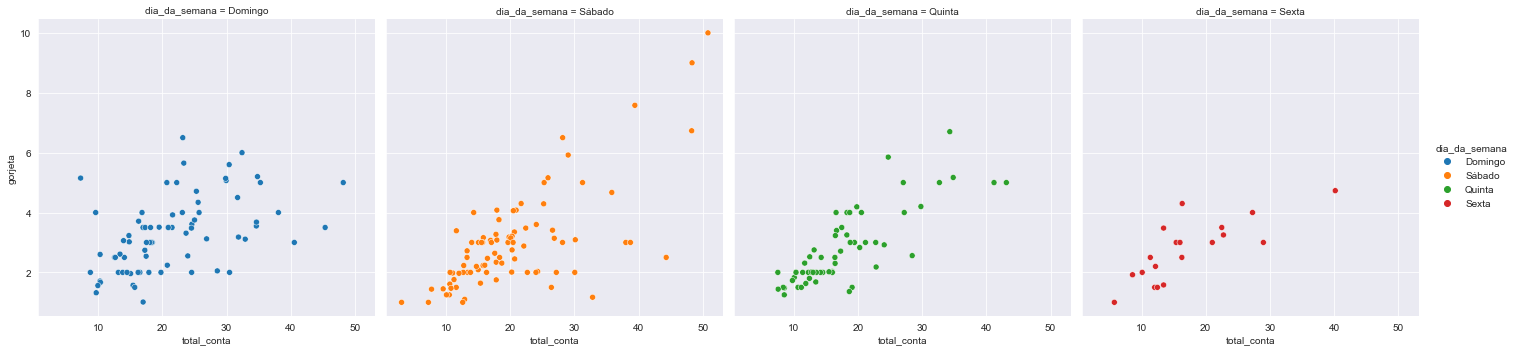

In [48]:
sns.relplot(x='total_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

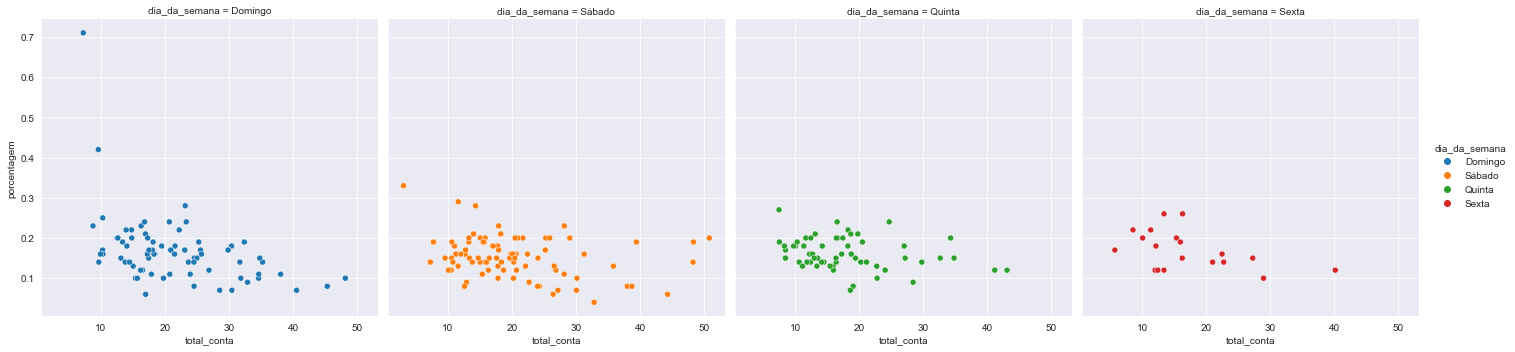

In [49]:
sns.relplot(x='total_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

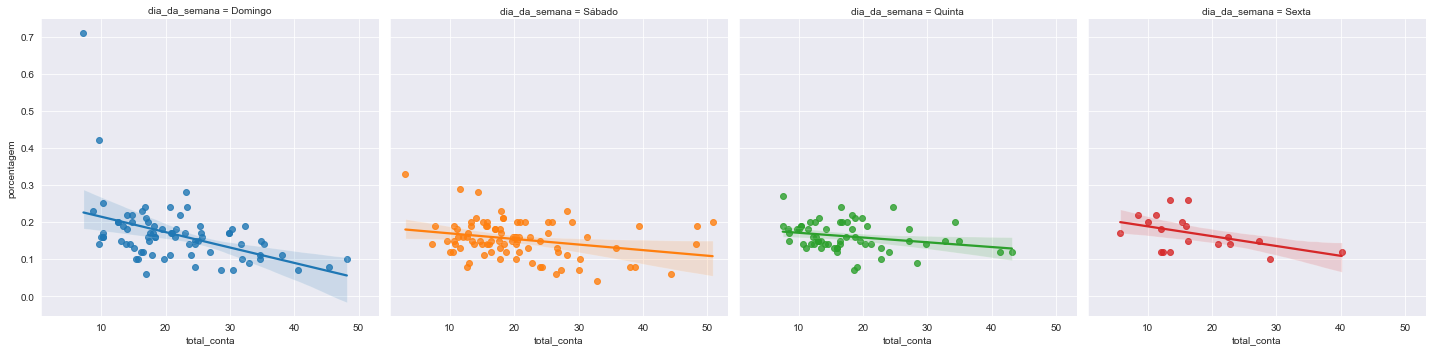

In [50]:
sns.lmplot(x='total_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [51]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [52]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


In [53]:
gorjetas.groupby(['dia_da_semana']).mean()[['total_conta', 'gorjeta', 'porcentagem']]

,total_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [54]:
# Qual a frenquencia de cada dia? vai mtas pessoas?
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese


**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [55]:
total_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").total_conta
total_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").total_conta

In [56]:
r2 = ranksums(total_conta_domingo, total_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**


# Análise 4 - Hora do dia

In [57]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [58]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

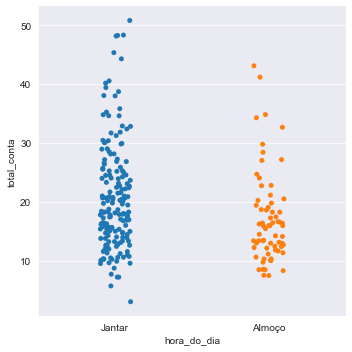

In [59]:
sns.catplot(x='hora_do_dia', y='total_conta', data=gorjetas)

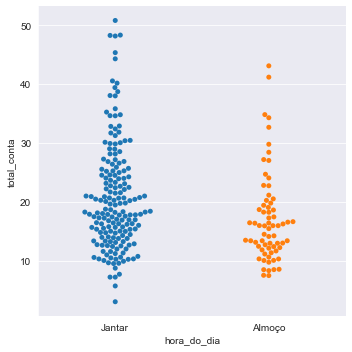

In [60]:
sns.catplot(x='hora_do_dia', y='total_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='total_conta'>

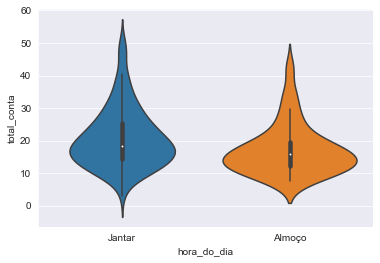

In [61]:
sns.violinplot(x='hora_do_dia', y='total_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='total_conta'>

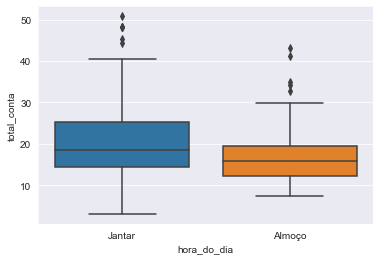

In [62]:
sns.boxplot(x='hora_do_dia', y='total_conta', data=gorjetas)

In [63]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").total_conta

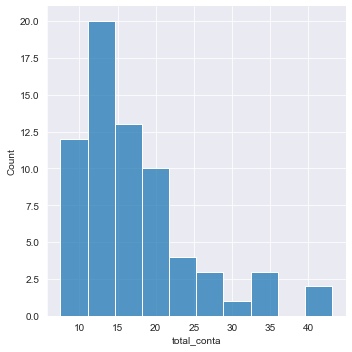

In [64]:
sns.displot(almoco, kde=False)

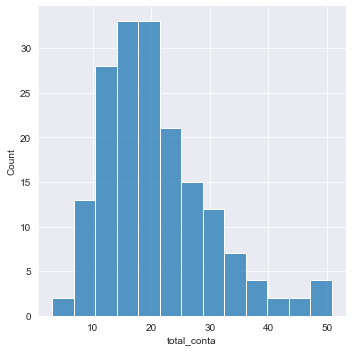

In [65]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").total_conta
sns.displot(jantar, kde=False)

In [66]:
gorjetas.groupby(['hora_do_dia']).mean()[['total_conta', 'gorjeta', 'porcentagem']]

,total_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [67]:
r3 = ranksums(almoco, jantar)

In [68]:
print(f'O valor de p-value é de {r3.pvalue}')

O valor de p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de Hipótese 2

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [69]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [70]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [71]:
print(f'O valor de p-value é de {r4.pvalue}')

O valor de p-value é de 0.2602493995587126


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**